In [49]:
import pandas as pd #allows to analyze big data and make conclusions based on statistical theories.

In [50]:
data = pd.read_csv('Iris.csv') #load the csv dataset
data.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [51]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [52]:
data.isna().sum() #check for missing values in the dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [53]:
data.shape #find out total rows and columns

(150, 6)

In [75]:
species_mapping = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica':2}
data['Species'] = data['Species'].map(species_mapping) #transforming the Species data into numerical format

In [55]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [56]:
x = data.drop('Species', axis = 1) 
y = data['Species'] # Split the dataset into features (x) and target variable (y)

In [57]:
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split # Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 42) 

In [60]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,23,4.6,3.6,1.0,0.2
15,16,5.7,4.4,1.5,0.4
65,66,6.7,3.1,4.4,1.4
11,12,4.8,3.4,1.6,0.2
42,43,4.4,3.2,1.3,0.2
...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3
106,107,4.9,2.5,4.5,1.7
14,15,5.8,4.0,1.2,0.2
92,93,5.8,2.6,4.0,1.2


In [61]:
X_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,74,6.1,2.8,4.7,1.2
18,19,5.7,3.8,1.7,0.3
118,119,7.7,2.6,6.9,2.3
78,79,6.0,2.9,4.5,1.5
76,77,6.8,2.8,4.8,1.4


In [62]:
from sklearn.tree import DecisionTreeClassifier # Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [63]:
y_predict = model.predict(X_test) # Make predictions on the testing set

In [64]:
res = pd.DataFrame({'actual' : Y_test, 'predicted': y_predict})

In [65]:
from sklearn.metrics import accuracy_score,recall_score,precision_score ,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

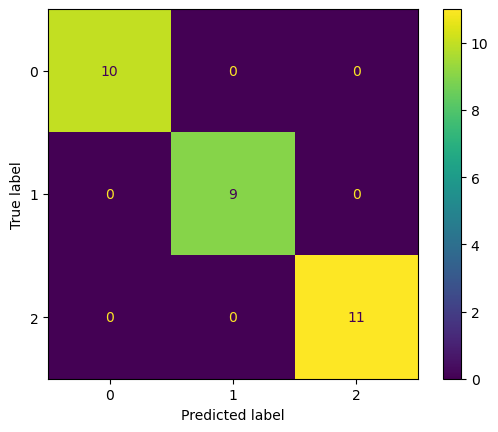

In [66]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_predict)

In [67]:
accuracy_score(Y_test,y_predict) #evaluation of model

1.0

In [68]:
recall_score(Y_test,y_predict,average = 'weighted')

1.0

In [69]:
precision_score(Y_test,y_predict,average = 'weighted')

1.0

In [70]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

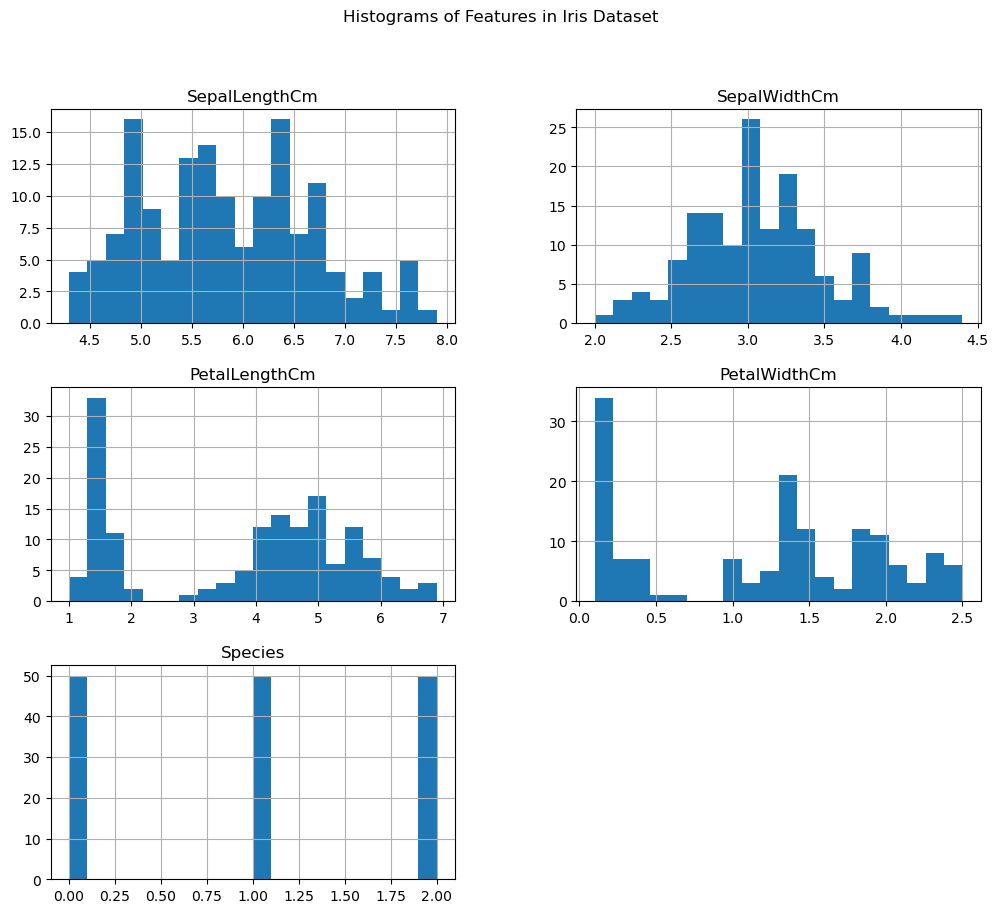

In [72]:
data1 = data.drop('Id', axis = 1) #drop ID from dataset
# Visualize the each feature using histograms
data1.hist(figsize=(12,10), bins=20)
plt.suptitle('Histograms of Features in Iris Dataset')
plt.show()

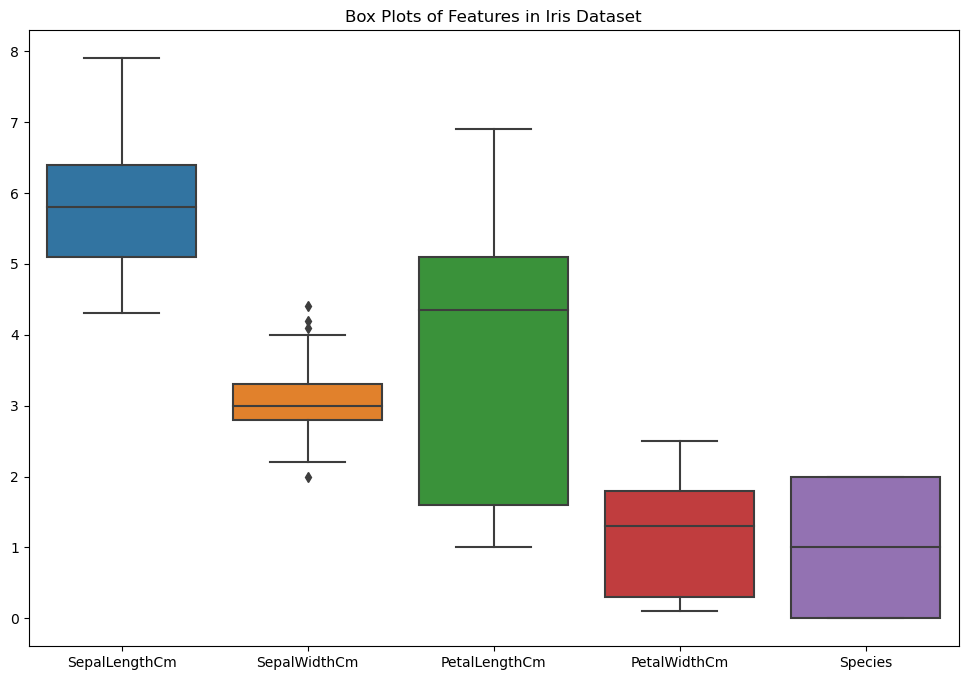

In [73]:
plt.figure(figsize=(12,8))
sns.boxplot(data1)
plt.title('Box Plots of Features in Iris Dataset')
plt.show()

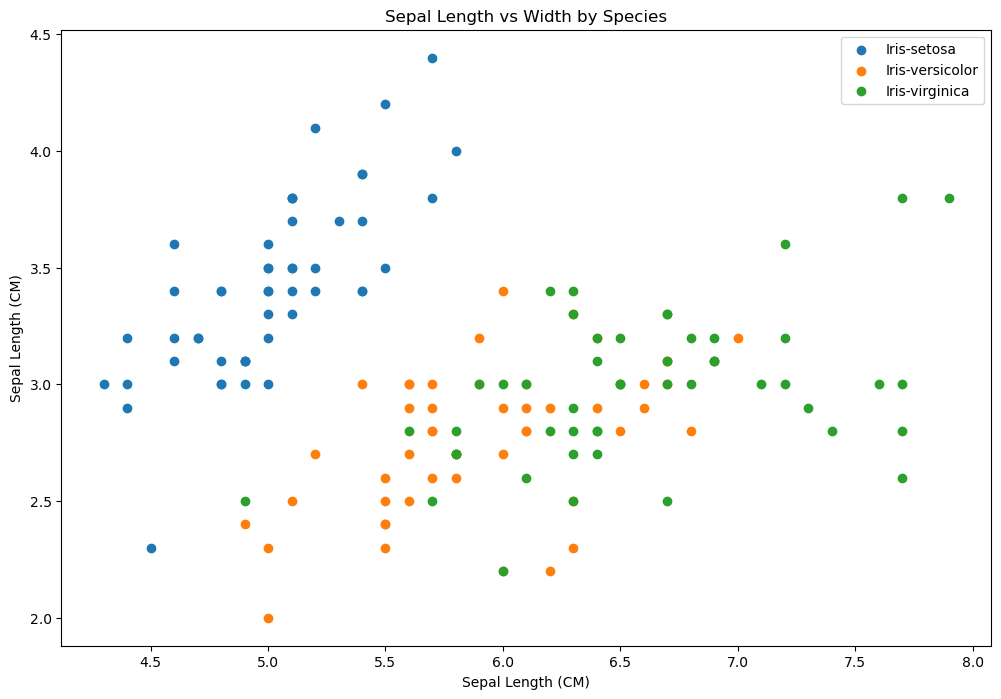

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(data1.SepalLengthCm[data1.Species == 0],data1.SepalWidthCm[data1.Species == 0],label="Iris-setosa")
plt.scatter(data1.SepalLengthCm[data1.Species == 1],data1.SepalWidthCm[data1.Species == 1],label="Iris-versicolor")
plt.scatter(data1.SepalLengthCm[data1.Species == 2],data1.SepalWidthCm[data1.Species == 2],label="Iris-virginica")
plt.xlabel("Sepal Length (CM)")
plt.ylabel("Sepal Length (CM)")
plt.title("Sepal Length vs Width by Species")
plt.legend()
plt.show()